In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from CourantFunctions import CourantFunctions as cf
import MathHelper as mh
import pandas as pd
sns.set(rc={'figure.figsize':(25,10)})
#input data
l = 0.1
N = 500
step = l/N
ro=7500
sigma=0
alpha=0.000002
w=0
f=0
c=139000000000
E=-15.1
D=0
g=0.000000646
hShtrih=100
Lambda=1.16
pSmall=0.00027   

In [2]:
#ФУНКЦІЇ куранта
fi = []
fiDerivatives = []
xi = [0]
for i in range(1,N+1):
    xi.append(xi[i-1]+step)

for i in range(0,N+1):
    new_function = cf(i,N,l)
    fi.append(new_function.fi)
    fiDerivatives.append(new_function.fiDerivative)

In [3]:
#матриця для заповнення якої потрібен тільки 1 коефіціент
def Fill1Koef(koeficient):
    CMatrix = list(np.zeros((N+1,3)))
    CMatrix[0][0] = 0
    CMatrix[0][1] = mh.IntegrateGauss(lambda x: (koeficient*fiDerivatives[0](x)*fiDerivatives[0](x)),xi[0],xi[1])
    CMatrix[0][2] = mh.IntegrateGauss(lambda x: (koeficient*fiDerivatives[0](x)*fiDerivatives[1](x)),xi[0],xi[1])
    
    for i in range(1,N):
        CMatrix[i][0] = mh.IntegrateGauss(lambda x: (koeficient*fiDerivatives[i-1](x)*fiDerivatives[i](x)),xi[i-1],xi[i])
        CMatrix[i][1] = mh.IntegrateGauss(lambda x: (koeficient*fiDerivatives[i](x)*fiDerivatives[i](x)),xi[i-1],xi[i])
        CMatrix[i][1] += mh.IntegrateGauss(lambda x: (koeficient*fiDerivatives[i](x)*fiDerivatives[i](x)),xi[i],xi[i+1])
        CMatrix[i][2] = mh.IntegrateGauss(lambda x: (koeficient*fiDerivatives[i](x)*fiDerivatives[i+1](x)),xi[i],xi[i+1])
    
    CMatrix[N][0] = mh.IntegrateGauss(lambda x: (koeficient*fiDerivatives[N-1](x)*fiDerivatives[N](x)),xi[N-1],xi[N])
    CMatrix[N][1] = mh.IntegrateGauss(lambda x: (koeficient*fiDerivatives[N](x)*fiDerivatives[N](x)),xi[N-1],xi[N])
    CMatrix[N][2] = 0
    
    CMatrixNew = list(np.zeros((N+1,N+1)))
    for i in range(0,N+1):
        CMatrixNew[i][i] = CMatrix[i][1]
        if i > 0:
            CMatrixNew[i][i-1] = CMatrix[i][0]
        if i < N:
            CMatrixNew[i][i+1] = CMatrix[i][2]
        
    return CMatrixNew

In [4]:
def FillYMatrix(c,alpha):
    CMatrix = list(np.zeros((N+1,3)))
    CMatrix[0][0] = 0
    CMatrix[0][1] = mh.IntegrateGauss(lambda x: (c*alpha*fi[0](x)*fiDerivatives[0](x)),xi[0],xi[1])
    CMatrix[0][2] = mh.IntegrateGauss(lambda x: (c*alpha*fi[0](x)*fiDerivatives[1](x)),xi[0],xi[1])
    
    for i in range(1,N):
        CMatrix[i][0] = mh.IntegrateGauss(lambda x: (c*alpha*fi[i](x)*fiDerivatives[i-1](x)),xi[i-1],xi[i])
        CMatrix[i][1] = mh.IntegrateGauss(lambda x: (c*alpha*fi[i](x)*fiDerivatives[i](x)),xi[i-1],xi[i])
        CMatrix[i][1] += mh.IntegrateGauss(lambda x: (c*alpha*fi[i](x)*fiDerivatives[i](x)),xi[i],xi[i+1])
        CMatrix[i][2] = mh.IntegrateGauss(lambda x: (c*alpha*fi[i](x)*fiDerivatives[i+1](x)),xi[i],xi[i+1])
    
    CMatrix[N][0] = mh.IntegrateGauss(lambda x: (c*alpha*fi[N](x)*fiDerivatives[N-1](x)),xi[N-1],xi[N])
    CMatrix[N][1] = mh.IntegrateGauss(lambda x: (c*alpha*fi[N](x)*fiDerivatives[N](x)),xi[N-1],xi[N])
    CMatrix[N][2] = 0
    
    CMatrixNew = list(np.zeros((N+1,N+1)))
    for i in range(0,N+1):
        CMatrixNew[i][i] = CMatrix[i][1]
        if i > 0:
            CMatrixNew[i][i-1] = CMatrix[i][0]
        if i < N:
            CMatrixNew[i][i+1] = CMatrix[i][2]
        
    return CMatrixNew

In [5]:
def FillPMatrix(p):
    CMatrix = list(np.zeros((N+1,3)))
    CMatrix[0][0] = 0
    CMatrix[0][1] = mh.IntegrateGauss(lambda x: (p*fi[0](x)*fiDerivatives[0](x)),xi[0],xi[1])
    CMatrix[0][2] = mh.IntegrateGauss(lambda x: (p*fi[0](x)*fiDerivatives[1](x)),xi[0],xi[1])
    
    for i in range(1,N):
        CMatrix[i][0] = mh.IntegrateGauss(lambda x: (p*fi[i](x)*fiDerivatives[i-1](x)),xi[i-1],xi[i])
        CMatrix[i][1] = mh.IntegrateGauss(lambda x: (p*fi[i](x)*fiDerivatives[i](x)),xi[i-1],xi[i])
        CMatrix[i][1] += mh.IntegrateGauss(lambda x: (p*fi[i](x)*fiDerivatives[i](x)),xi[i],xi[i+1])
        CMatrix[i][2] = mh.IntegrateGauss(lambda x: (p*fi[i](x)*fiDerivatives[i+1](x)),xi[i],xi[i+1])
    
    CMatrix[N][0] = mh.IntegrateGauss(lambda x: (p*fi[N](x)*fiDerivatives[N-1](x)),xi[N-1],xi[N])
    CMatrix[N][1] = mh.IntegrateGauss(lambda x: (p*fi[N](x)*fiDerivatives[N](x)),xi[N-1],xi[N])
    CMatrix[N][2] = 0
    
    CMatrixNew = list(np.zeros((N+1,N+1)))
    for i in range(0,N+1):
        CMatrixNew[i][i] = CMatrix[i][1]
        if i > 0:
            CMatrixNew[i][i-1] = CMatrix[i][0]
        if i < N:
            CMatrixNew[i][i+1] = CMatrix[i][2]
        
    return CMatrixNew

In [6]:
#matrix instanciation
CMatrix = Fill1Koef(c)
EMatrix = Fill1Koef(E)
YMatrix = FillYMatrix(c,alpha)
GMatrix = Fill1Koef(g)
KMatrix = Fill1Koef(Lambda)
PMatrix = Fill1Koef(pSmall)

MainMatrix = list(np.zeros((3*(N+1),3*(N+1))))
for i in range(0,N+1):
    for j in range(0,N+1):
        #first row
        MainMatrix[i][j] = CMatrix[i][j]
        MainMatrix[i][j+N+1] = EMatrix[i][j]
        MainMatrix[i][j+2*(N+1)] = (-1)*YMatrix[i][j]
        #second row
        MainMatrix[i+N+1][j] = EMatrix[i][j]
        MainMatrix[i+N+1][j+N+1] = (-1)*GMatrix[i][j]
        MainMatrix[i+N+1][j+2*(N+1)] = PMatrix[i][j]
        #third row
        MainMatrix[i+2*(N+1)][j+2*(N+1)] = KMatrix[i][j]

        
MainMatrix[0][0] = pow(10,20)
MainMatrix[N+1][N+1] = pow(10,20)
MainMatrix[2*N+2][2*N+2] = pow(10,20)


In [7]:
#left value vectors
LV = np.zeros((N+1))
for i in range(0,N+1):
    LV[i]=mh.IntegrateGauss(lambda x: (ro*f*fi[i](x)),0,l)+ sigma*fi[i](l)

RQ = np.zeros((N+1))
for i in range(0,N+1):
    RQ[i]=D*fi[i](l)
    
UXI = np.zeros((N+1))
for i in range(0,N+1):
    UXI[i] = mh.IntegrateGauss(lambda x: (ro*w*fi[i](x)),0,l) - hShtrih*fi[i](l)

MainVector = list(LV) + list(RQ) + list(UXI)

In [8]:
#solving SLE
result = mh.Gauss(MainMatrix,MainVector)
#print("result:")
#print(result)
uKoefs = np.zeros((N+1))
pKoefs = np.zeros((N+1))
thettaKoefs = np.zeros((N+1))
for i in range(0,N+1):
    uKoefs[i] = result[i]
    pKoefs[i] = result[N+1+i]
    thettaKoefs[i] = result[2*N+2+i]

          X             U             P        Thetta
0    0.0000 -2.396568e-14 -5.622957e-34 -1.000000e-18
1    0.0002 -4.216970e-09 -7.107580e+00 -1.724138e-02
2    0.0004 -8.427037e-09 -1.421532e+01 -3.448276e-02
3    0.0006 -1.263022e-08 -2.132322e+01 -5.172414e-02
4    0.0008 -1.682653e-08 -2.843128e+01 -6.896552e-02
..      ...           ...           ...           ...
496  0.0992 -1.247129e-06 -3.545099e+03 -8.551724e+00
497  0.0994 -1.247934e-06 -3.552286e+03 -8.568966e+00
498  0.0996 -1.248732e-06 -3.559474e+03 -8.586207e+00
499  0.0998 -1.249523e-06 -3.566661e+03 -8.603448e+00
500  0.1000 -1.250307e-06 -3.573849e+03 -8.620690e+00

[501 rows x 4 columns]


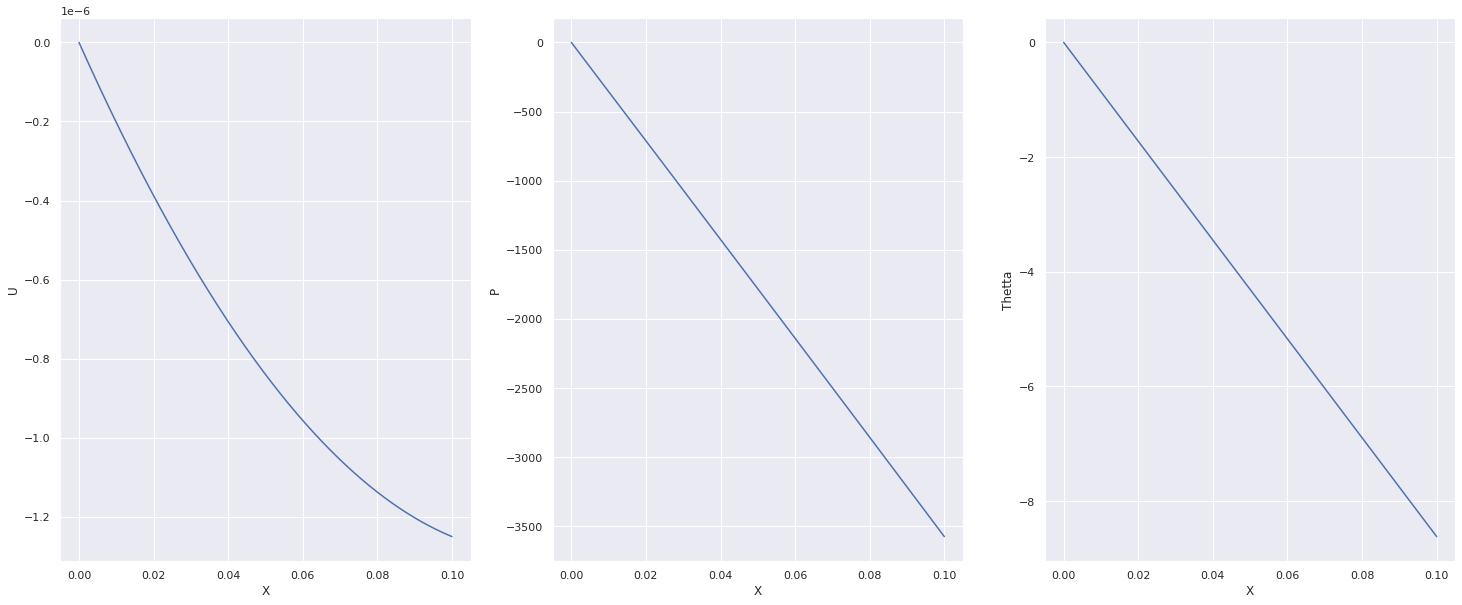

In [9]:
#plots
df = pd.DataFrame(list(zip(xi,uKoefs, pKoefs,thettaKoefs)),
               columns =['X' ,'U', 'P', 'Thetta'])
fig, axs = plt.subplots(ncols=3)

sns.lineplot(data = df, x = "X",y = "U",ax=axs[0])
sns.lineplot(data = df, x = "X",y = "P",ax=axs[1])
sns.lineplot(data = df, x = "X",y = "Thetta",ax=axs[2])
print(df)

In [10]:
print(fi[0](l))

0
